In [18]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# helper functions
def is_float(str):
    try:
        float(str)
        return True
    except ValueError:
        return False

In [37]:
# read input
import csv

filename_original = "data/ODI-2018.csv"
filename = "data/ODI-2018_clean.csv"

df = pd.read_csv(filename)
df_ori = pd.read_csv(filename_original)

with open(filename,'r') as csvfile:
    # Set the right quote character and delimiter
    csv_contents = [{k: v for k, v in row.items()}
        for row in csv.DictReader(csvfile, skipinitialspace=True, quotechar='"', delimiter=',')]

print("columns:")#, sorted(csv_contents[0].keys()))
col_no = 0
for col in sorted(csv_contents[0].keys()):
    print(col_no, col)
    col_no += 1

columns:
0 bed_time
1 birthday
2 chocolate_effect
3 course_db
4 course_ir
5 course_ml
6 course_stat
7 gender
8 good_day1
9 good_day2
10 money
11 num_neighbors
12 program
13 random_number
14 stand_up


In [5]:
#records
print("There are {} records".format(len(csv_contents)))
#attributes
print("There are {} attributes".format(len(csv_contents[0])))
#range of values
print("eens kijken of dit werkt")
#distribution of values
#relationships between attributes
#so on

There are 202 records
There are 15 attributes
eens kijken of dit werkt


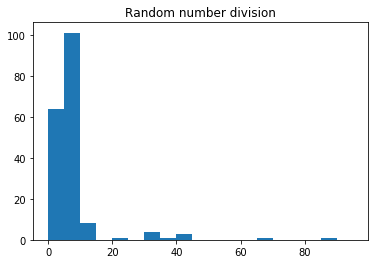

count     202
unique     38
top         7
freq       33
Name: random_number, dtype: object

In [50]:
random_numbers = [csv_contents[x]["random_number"] for x in range(len(csv_contents))]
plt.title("Random number division")
plt.hist(np.array([float(x) for x in random_numbers if is_float(x)]), np.arange(0,100,5))
plt.show()
df.random_number.describe()

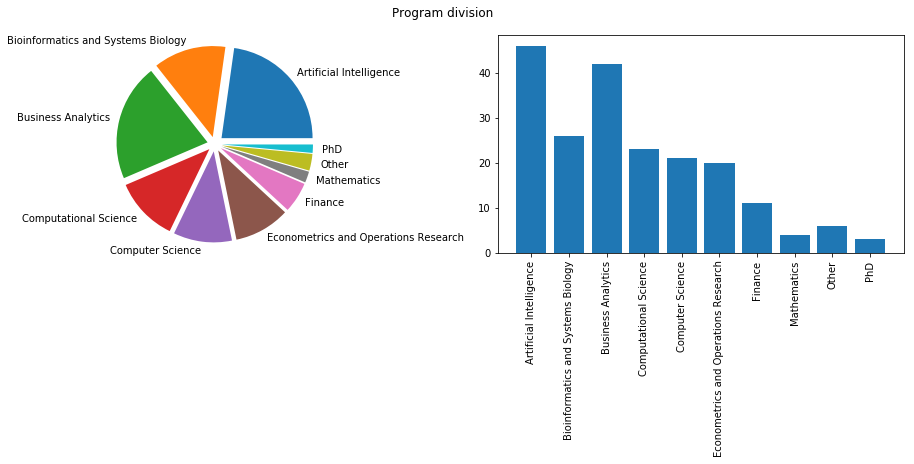

In [42]:
# pie chart of program distribution
programs = [csv_contents[x]["program"] for x in range(len(csv_contents))]
programs = [p if programs.count(p) > 1 else "Other" for p in programs] # all single records are "Other"
labels = sorted([x for x in set(programs) if len(x) > 0])
sizes = [programs.count(label) for label in labels]
explode = tuple(0.1 if s == max(sizes) else 0.08 for s in sizes)
plt.figure(figsize=(16,4))
plt.suptitle("Program division")
plt.subplot(121)
plt.pie(sizes, explode=explode, labels=labels)
plt.axis('equal')
plt.subplot(122)
plt.bar(labels, np.array(sizes))
plt.xticks(rotation='vertical')
plt.savefig("program_division.png")
plt.show()


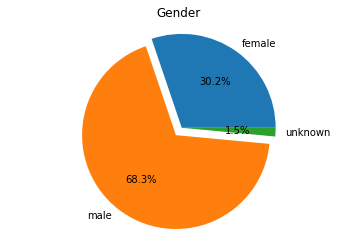

In [47]:
# pie chart of gender distribution
genders = [csv_contents[x]["gender"] for x in range(len(csv_contents))]
labels = sorted([x for x in set(genders) if len(x) > 0])
sizes = [genders.count(label) for label in labels]
explode = tuple(0.1 if s == max(sizes) else 0.0 for s in sizes)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
plt.gca().set_title("Gender")
plt.axis('equal')
plt.show()

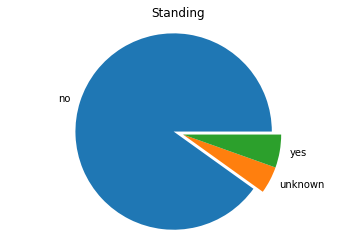

In [9]:
# pie chart of standing distribution
stood_up = [csv_contents[x]["stand_up"] for x in range(len(csv_contents))]
labels = sorted([x for x in set(stood_up) if len(x) > 0])
sizes = [stood_up.count(label) for label in labels]
explode = tuple(0.1 if s == max(sizes) else 0.0 for s in sizes)
plt.pie(sizes, explode=explode, labels=labels)
plt.gca().set_title("Standing")
plt.axis('equal')
plt.show()

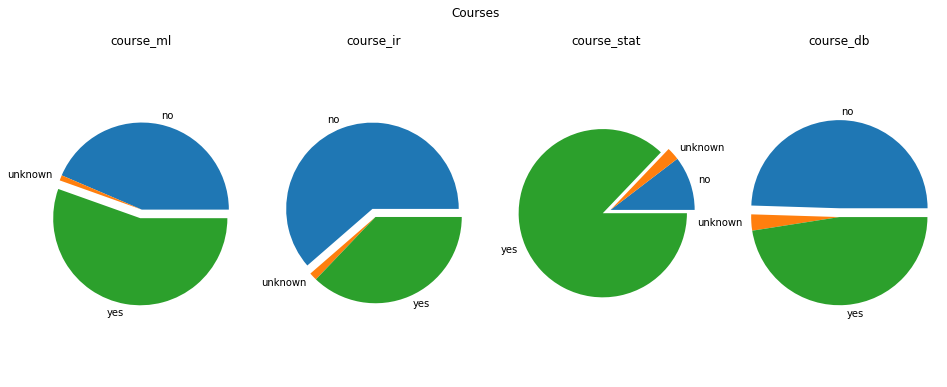

In [43]:
# pie chart of courses
plt.figure(figsize=(16,6))
plt.suptitle("Courses")
courses = [col for col in csv_contents[0].keys() if "course" in col]
for i in range(len(courses)):
    course_db = [csv_contents[x][courses[i]] for x in range(len(csv_contents))]
    labels = sorted([x for x in set(course_db) if len(x) > 0])
    sizes = [course_db.count(label) for label in labels]
    explode = tuple(0.1 if s == max(sizes) else 0.0 for s in sizes)
    subplotno = 141 + i
    plt.subplot(subplotno)
    plt.gca().set_title(courses[i])
    plt.pie(sizes, explode=explode, labels=labels)
    plt.axis('equal')
plt.savefig("courses_followed.png")
plt.show()


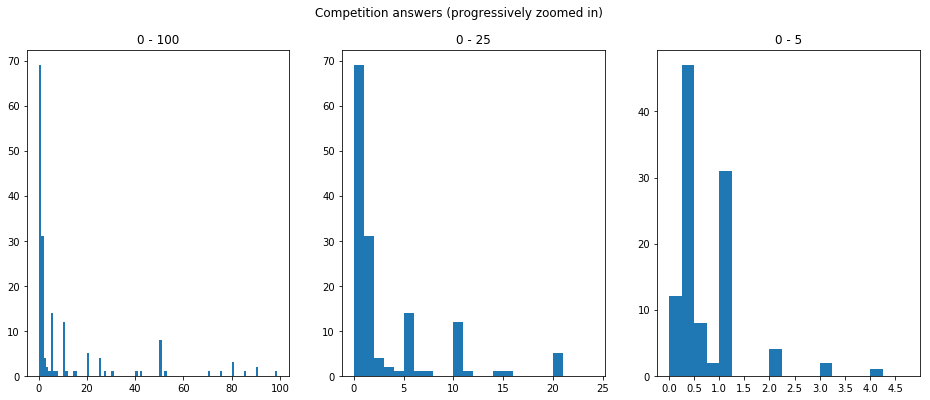

In [44]:
# plots of the competition answers
comp_numbers = [csv_contents[x]["money"] for x in range(len(csv_contents))]
plt.figure(figsize=(16,6))
plt.suptitle("Competition answers (progressively zoomed in)")
plt.subplot(131)
plt.title("0 - 100")
plt.hist(np.array([float(x) for x in comp_numbers if is_float(x)]), np.arange(0,100,1))
plt.subplot(132)
plt.title("0 - 25")
plt.hist(np.array([float(x) for x in comp_numbers if is_float(x)]), np.arange(0,25,1))
plt.subplot(133)
plt.title("0 - 5")
plt.hist(np.array([float(x) for x in comp_numbers if is_float(x)]), np.arange(0,5,.25))
plt.xticks(np.arange(0,5,.5))
plt.savefig("competition_answers.png")
plt.show()

In [12]:
df.describe()

,program,course_ml,course_ir,course_stat,course_db,gender,chocolate_effect,birthday,num_neighbors,stand_up,money,random_number,bed_time,good_day1,good_day2
count,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
unique,15,3,3,3,3,3,5,197,23,3,47,38,56,14,13
top,Artificial Intelligence,yes,no,yes,no,male,fat,02-09-1990,1,no,1,7,01:00,Weather,Food
freq,46,112,124,176,100,138,69,2,36,182,31,33,25,47,37


In [13]:
# data = pd.concat([df['gender'], df['num_neighbors']], axis=1)
# data.plot.scatter(x='num_neighbors', y='gender', ylim=(0,800000));


253


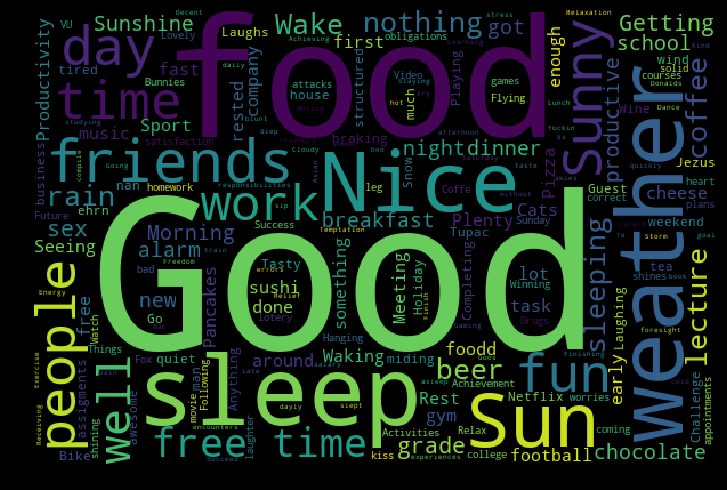

In [45]:
things = set()
for thing in df_ori['What makes a good day for you (1)?']:
    things.add(str(thing))
for thing in df_ori['What makes a good day for you (2)?']:
    things.add(str(thing))
print(len(things))
good_day_cloud = WordCloud(width=600, height=400).generate(text=" ".join(things))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(good_day_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("goodday_wordcloud.png")
plt.show()

In [15]:
for col in df.columns:
    for thing in df[col].value_counts():
        if thing == 47:
            print( df[col].value_counts() )
            continue

Weather      47
Food         41
Sleep        23
Free time    18
Work         14
Coffee       13
unknown      11
Sex           8
Friends       7
Sports        6
Fun           5
Animals       4
Beer          3
TV            2
Name: good_day1, dtype: int64
